# Clustering

In [29]:
import numpy as np
import pandas as pd
import requests
from requests.auth import HTTPBasicAuth
import json

import warnings
warnings.filterwarnings("ignore")

#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [30]:
data = pd.read_csv(r"C:\Users\kuksj\Downloads\Result - 1 2025-09-10 08-49-41.csv.zip", compression = "zip")
data.head(1)

,player_id,player,partner,partner_id,currency,balance,country,player_type,player_flags,affiliate,bonus_granted,bonus_costs,rebates_claimable_instant,rebates_claimable_payment,rebates_claimable_periodic,rebates_claimed_instant,rebates_claimed_payment,rebates_claimed_periodic,deposit_amount,deposit_count,withdrawal_amount,withdrawal_count,pending_bets,pending_bets_amount,liability,pending_bets_all,pending_bets_amount_all,liability_all,adjustments,bet_count_casino,rm_bets_casino,rm_win_casino,bonus_bets_casino,bonus_win_casino,jp_contribution,jp_win,fs_win,bet_count_casino_live,rm_bets_casino_live,rm_win_casino_live,bonus_bets_casino_live,bonus_win_casino_live,jp_contribution_live,jp_win_live,fs_win_live,bet_count_casino_slot,rm_bets_casino_slot,rm_win_casino_slot,bonus_bets_casino_slot,bonus_win_casino_slot,jp_contribution_slot,jp_win_slot,fs_win_slot,net_deposit,ngr,rm_bets,rm_win,ggr,bonus_bets,bonus_win,bonus_revenue,total_bets,total_win,total_revenue,bet_count_sports,rm_bets_sports,rm_win_sports,ggr_sport,bonus_bets_sports,bonus_win_sports,bonus_revenue_sports,total_bets_sports,total_win_sports,payout_sports,ggr_casino,bonus_revenue_casino,total_bet_casino,total_win_casino,total_revenue_casino,has_action,ggr_casino_live,total_bet_casino_live,total_win_casino_live,total_revenue_casino_live,ggr_casino_slot,total_bet_casino_slot,total_win_casino_slot,total_revenue_casino_slot
0,462,donzkie1414 | 462,GemBet,2,USD,0,PHL,Regular,"[""Accessible"", ""Validated"", ""EmailValidated"", ...",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,12345600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [31]:
# data.dtypes

In [32]:
data = data.select_dtypes(include=['float64', 'int64'])

In [33]:
data.shape

(172890, 81)

In [34]:
data.sample()

,player_id,partner_id,balance,bonus_granted,bonus_costs,rebates_claimable_instant,rebates_claimable_payment,rebates_claimable_periodic,rebates_claimed_instant,rebates_claimed_payment,rebates_claimed_periodic,deposit_amount,deposit_count,withdrawal_amount,withdrawal_count,pending_bets,pending_bets_amount,liability,pending_bets_all,pending_bets_amount_all,liability_all,adjustments,bet_count_casino,rm_bets_casino,rm_win_casino,bonus_bets_casino,bonus_win_casino,jp_contribution,jp_win,fs_win,bet_count_casino_live,rm_bets_casino_live,rm_win_casino_live,bonus_bets_casino_live,bonus_win_casino_live,jp_contribution_live,jp_win_live,fs_win_live,bet_count_casino_slot,rm_bets_casino_slot,rm_win_casino_slot,bonus_bets_casino_slot,bonus_win_casino_slot,jp_contribution_slot,jp_win_slot,fs_win_slot,net_deposit,ngr,rm_bets,rm_win,ggr,bonus_bets,bonus_win,bonus_revenue,total_bets,total_win,total_revenue,bet_count_sports,rm_bets_sports,rm_win_sports,ggr_sport,bonus_bets_sports,bonus_win_sports,bonus_revenue_sports,total_bets_sports,total_win_sports,payout_sports,ggr_casino,bonus_revenue_casino,total_bet_casino,total_win_casino,total_revenue_casino,has_action,ggr_casino_live,total_bet_casino_live,total_win_casino_live,total_revenue_casino_live,ggr_casino_slot,total_bet_casino_slot,total_win_casino_slot,total_revenue_casino_slot
101861,168493,2,0,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,70,0,0,3295,1799,0,0,0,0,0,0,0,0,0,0,0,70,0,0,3295,1799,0,0,0,0,0,0,0,0,3295,1799,1496,3295,1799,1496,0,0,0,0,0,0,0,0,0,0,0,1496,3295,1799,1496,1,0,0,0,0,0,3295,1799,1496


In [37]:
data.describe().round()

,player_id,partner_id,balance,bonus_granted,bonus_costs,rebates_claimable_instant,rebates_claimable_payment,rebates_claimable_periodic,rebates_claimed_instant,rebates_claimed_payment,rebates_claimed_periodic,deposit_amount,deposit_count,withdrawal_amount,withdrawal_count,pending_bets,pending_bets_amount,liability,pending_bets_all,pending_bets_amount_all,liability_all,adjustments,bet_count_casino,rm_bets_casino,rm_win_casino,bonus_bets_casino,bonus_win_casino,jp_contribution,jp_win,fs_win,bet_count_casino_live,rm_bets_casino_live,rm_win_casino_live,bonus_bets_casino_live,bonus_win_casino_live,jp_contribution_live,jp_win_live,fs_win_live,bet_count_casino_slot,rm_bets_casino_slot,rm_win_casino_slot,bonus_bets_casino_slot,bonus_win_casino_slot,jp_contribution_slot,jp_win_slot,fs_win_slot,net_deposit,ngr,rm_bets,rm_win,ggr,bonus_bets,bonus_win,bonus_revenue,total_bets,total_win,total_revenue,bet_count_sports,rm_bets_sports,rm_win_sports,ggr_sport,bonus_bets_sports,bonus_win_sports,bonus_revenue_sports,total_bets_sports,total_win_sports,payout_sports,ggr_casino,bonus_revenue_casino,total_bet_casino,total_win_casino,total_revenue_casino,has_action,ggr_casino_live,total_bet_casino_live,total_win_casino_live,total_revenue_casino_live,ggr_casino_slot,total_bet_casino_slot,total_win_casino_slot,total_revenue_casino_slot
count,172890.0,172890.0,1.728900e+05,172890.0,172890.0,172890.0,172890.0,172890.0,172890.0,172890.0,172890.0,1.728900e+05,172890.0,1.728900e+05,172890.0,172890.0,172890.0,172890.0,172890.0,172890.0,172890.0,1.728900e+05,172890.0,1.728900e+05,1.728900e+05,172890.0,172890.0,172890.0,172890.0,172890.0,172890.0,1.728900e+05,1.728900e+05,172890.0,172890.0,172890.0,172890.0,172890.0,172890.0,1.728900e+05,1.728900e+05,172890.0,172890.0,172890.0,172890.0,172890.0,1.728900e+05,1.728900e+05,1.728900e+05,1.728900e+05,1.728900e+05,172890.0,172890.0,172890.0,1.728900e+05,1.728900e+05,1.728900e+05,172890.0,1.728900e+05,1.728900e+05,1.728900e+05,172890.0,172890.0,172890.0,1.728900e+05,1.728900e+05,1.728900e+05,1.728900e+05,172890.0,1.728900e+05,1.728900e+05,1.728900e+05,172890.0,172890.0,1.728900e+05,1.728900e+05,172890.0,1.728900e+05,1.728900e+05,1.728900e+05,1.728900e+05
mean,291569.0,2.0,2.393900e+04,23024.0,18693.0,7594.0,13327.0,5438.0,19639.0,3762.0,6799.0,1.470336e+06,28.0,1.961394e+06,9.0,0.0,880.0,1612.0,0.0,896.0,1708.0,1.089390e+05,2805.0,5.147162e+06,5.064178e+06,119411.0,116216.0,6.0,1.0,154.0,697.0,4.123715e+06,4.036902e+06,90182.0,88111.0,0.0,0.0,0.0,2108.0,1.023447e+06,1.027275e+06,29229.0,28105.0,6.0,1.0,154.0,-4.910590e+05,-7.156060e+05,7.245393e+06,7.917956e+06,-6.724130e+05,137237.0,132486.0,4751.0,7.382622e+06,8.050434e+06,-6.676620e+05,57.0,2.098231e+06,2.853778e+06,-7.555470e+05,17826.0,16270.0,1556.0,2.116050e+06,2.870041e+06,-7.539910e+05,8.313400e+04,3195.0,5.266573e+06,5.180394e+06,8.632900e+04,1.0,86813.0,4.213897e+06,4.125014e+06,88884.0,-3.679000e+03,1.052675e+06,1.055380e+06,-2.555000e+03
std,166185.0,0.0,5.764189e+06,211621.0,180775.0,419460.0,812901.0,764756.0,422768.0,42591.0,113433.0,4.982184e+07,199.0,7.890521e+07,68.0,0.0,355251.0,505078.0,0.0,355253.0,505273.0,1.879694e+07,39152.0,1.007324e+08,1.107529e+08,1509183.0,1493671.0,753.0,271.0,2656.0,5448.0,7.888669e+07,7.802808e+07,1113638.0,1115794.0,0.0,0.0,0.0,38176.0,6.127938e+07,7.765138e+07,850630.0,824080.0,753.0,271.0,2656.0,4.570947e+07,5.571342e+07,1.460378e+08,1.806713e+08,5.572315e+07,1558100.0,1537603.0,80932.0,1.464588e+08,1.809936e+08,5.572411e+07,782.0,9.876038e+07,1.362654e+08,4.845669e+07,292371.0,275764.0,35184.0,9.878091e+07,1.362782e+08,4.845696e+07,2.762247e+07,71594.0,1.012957e+08,1.112419e+08,2.762360e+07,0.0,3810209.0,7.951407e+07,7.863442e+07,3816654.0,2.738725e+07,6.133677e+07,7.769418e+07,2.738739e+07
min,130.0,2.0,0.000000e+00,0.0,-7820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,-1.000000e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.

## EDA

In [38]:
def distribution_analysis(attr, agg_col, df:pd.DataFrame, label_zero, label_one, label_two):
    #print(df.groupby(agg_col)[attr].mean())
    sns.kdeplot(df[(df[agg_col]==label_zero) &(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label = label_zero, color='red')
    sns.kdeplot(df[(df[agg_col]==label_one)&(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label = label_one, color='green')
    sns.kdeplot(df[(df[agg_col]==label_two)&(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label = label_two, color='blue')
    
    plt.title("Distribution of {} vs. {}".format(attr, agg_col))
    plt.legend()
    plt.show()

In [26]:
X = data.drop(columns= "player_id")

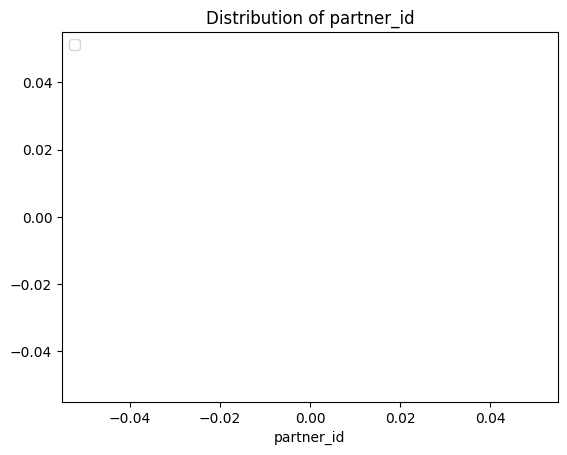

####################################################################################


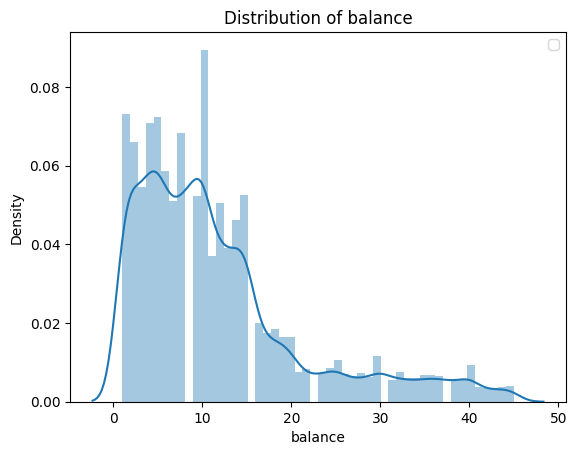

####################################################################################


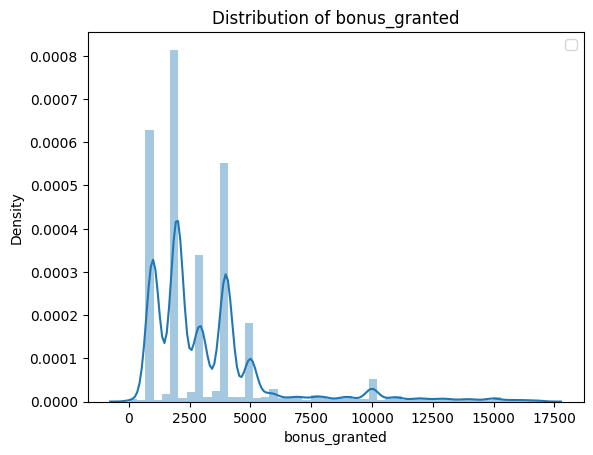

####################################################################################


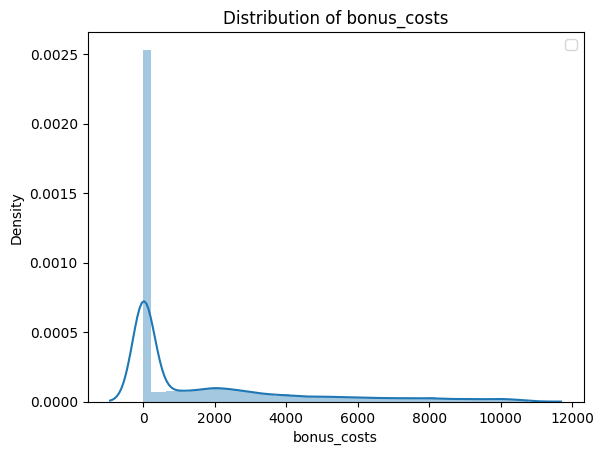

####################################################################################


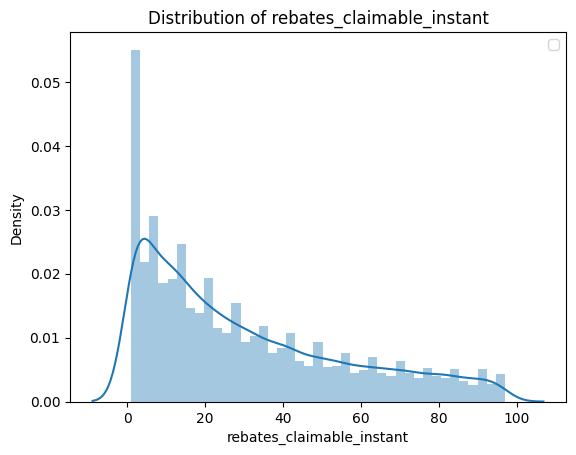

####################################################################################


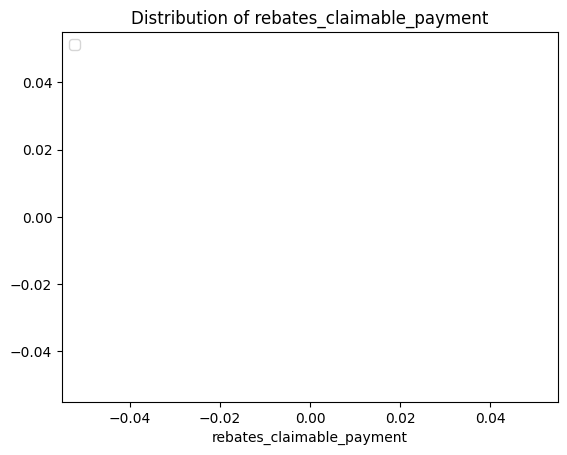

####################################################################################


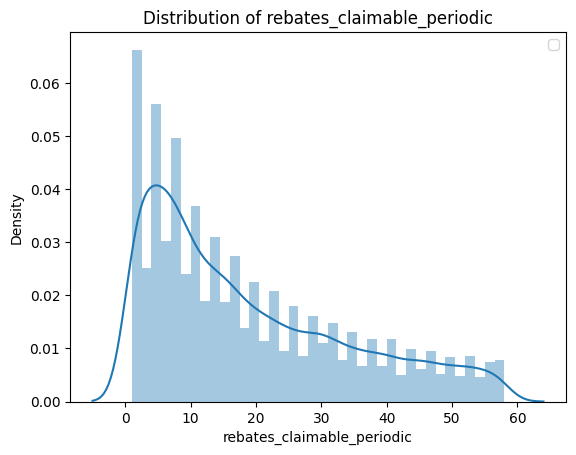

####################################################################################


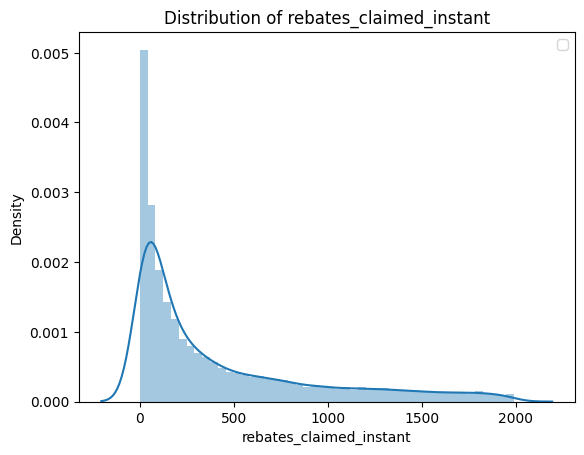

####################################################################################


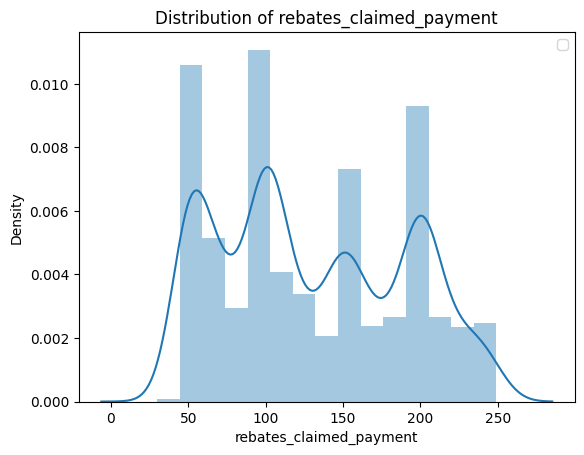

####################################################################################


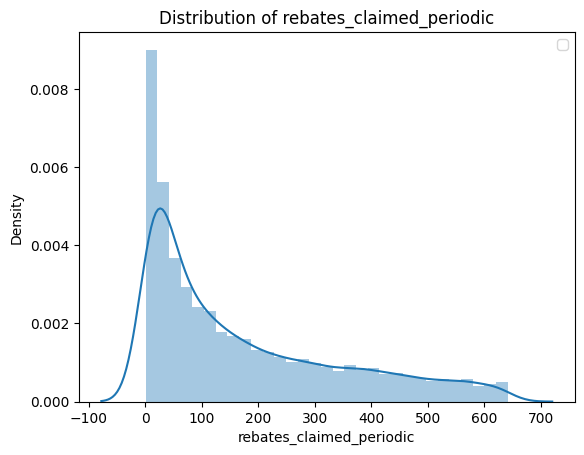

####################################################################################


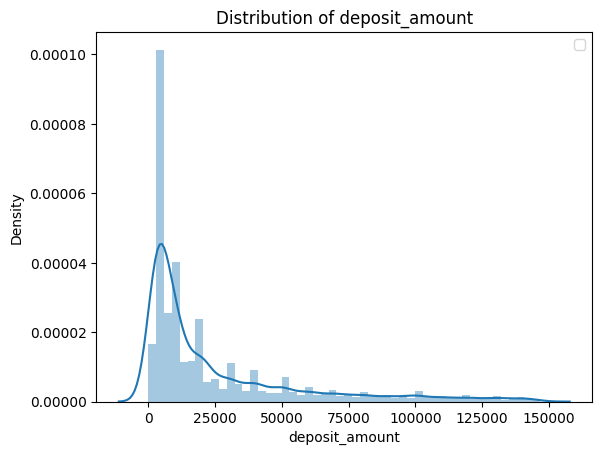

####################################################################################


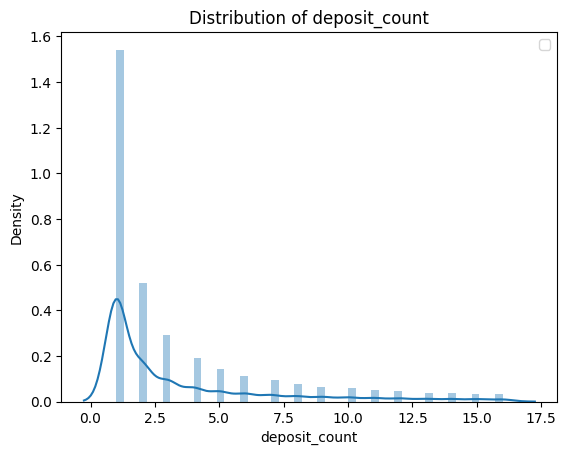

####################################################################################


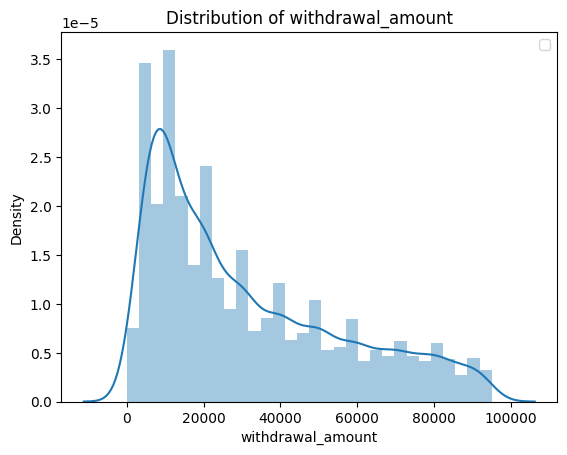

####################################################################################


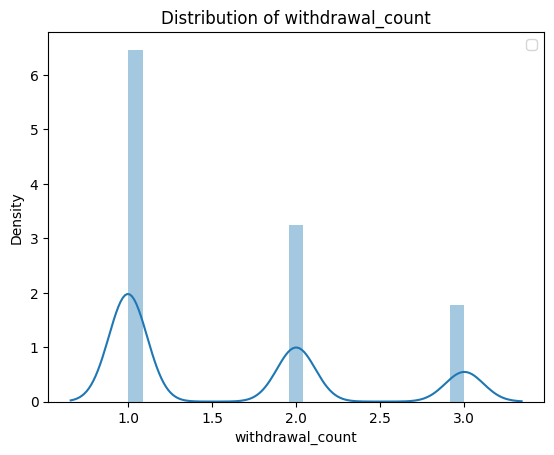

####################################################################################


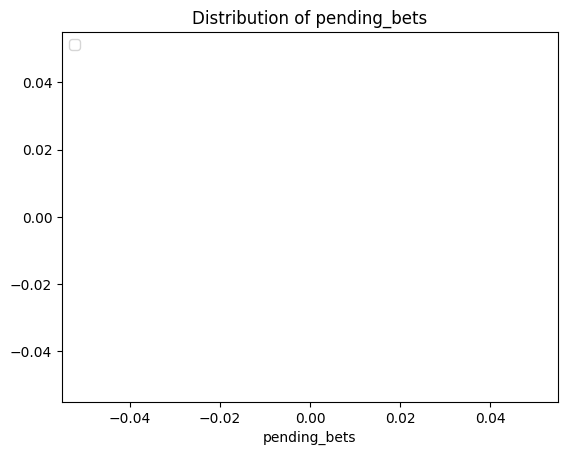

####################################################################################


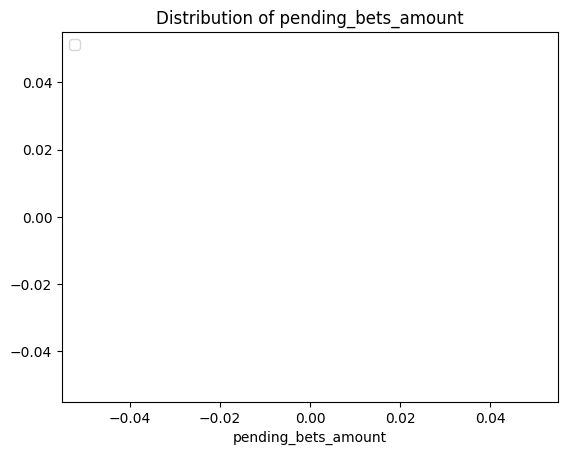

####################################################################################


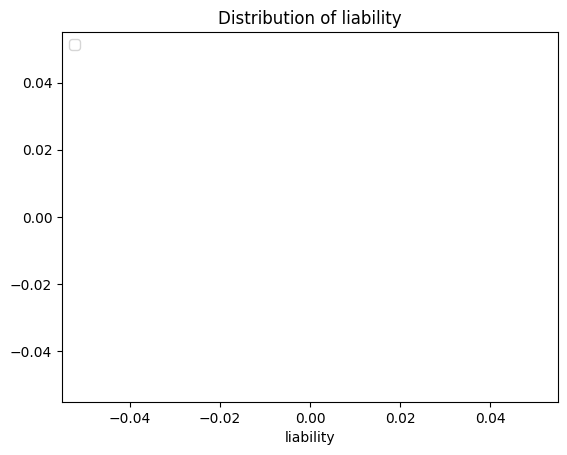

####################################################################################


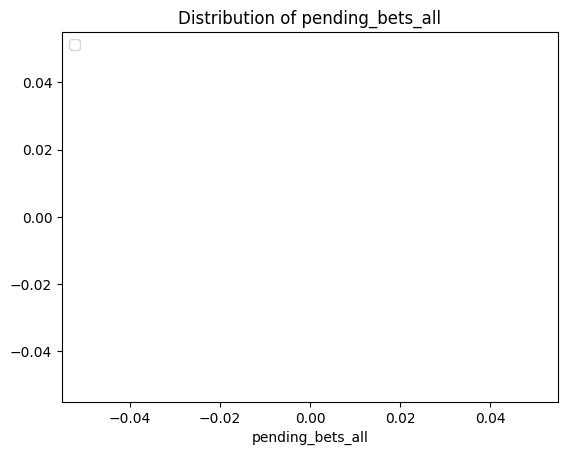

####################################################################################


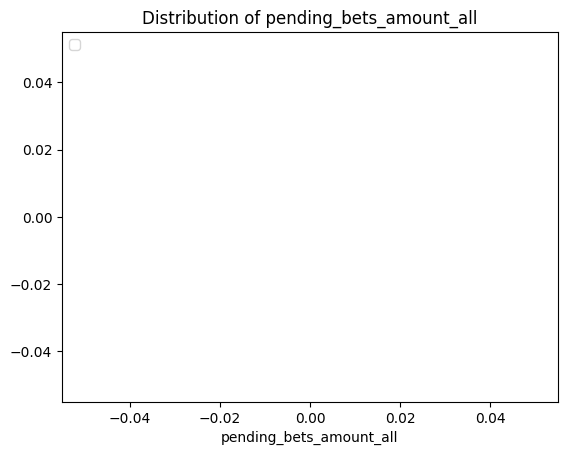

####################################################################################


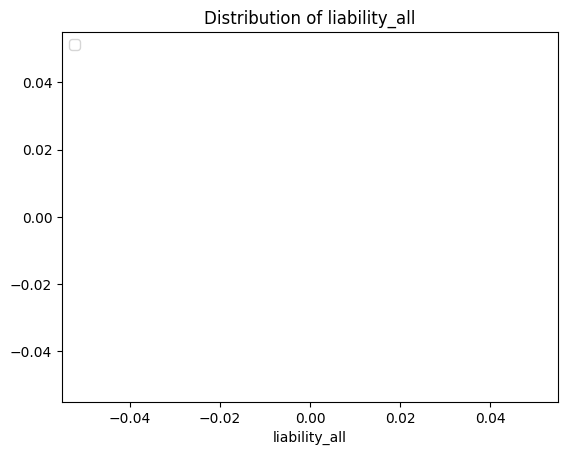

####################################################################################


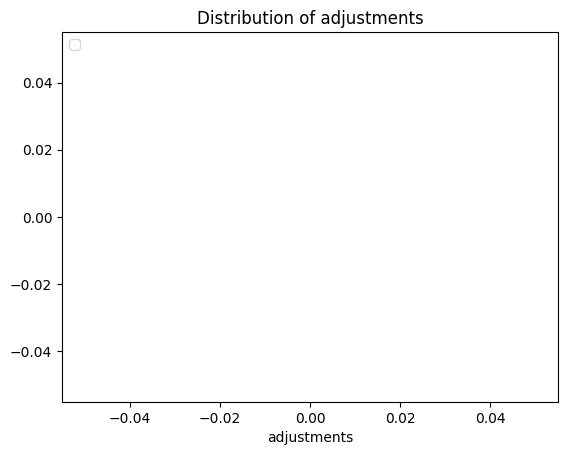

####################################################################################


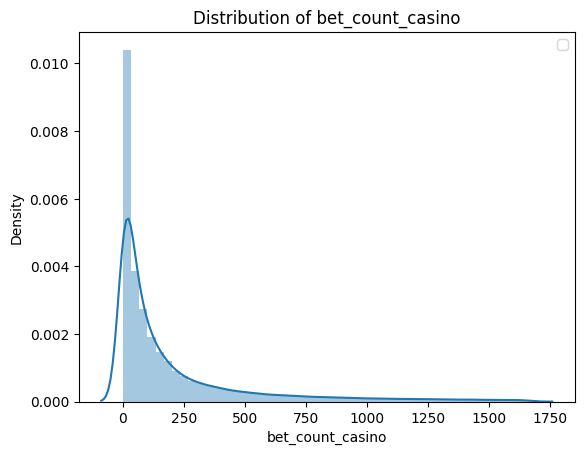

####################################################################################


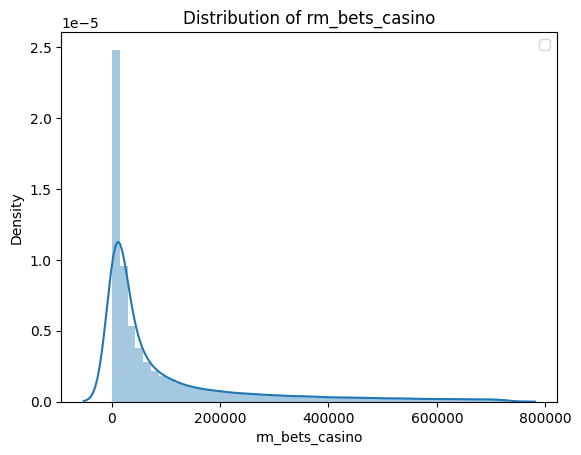

####################################################################################


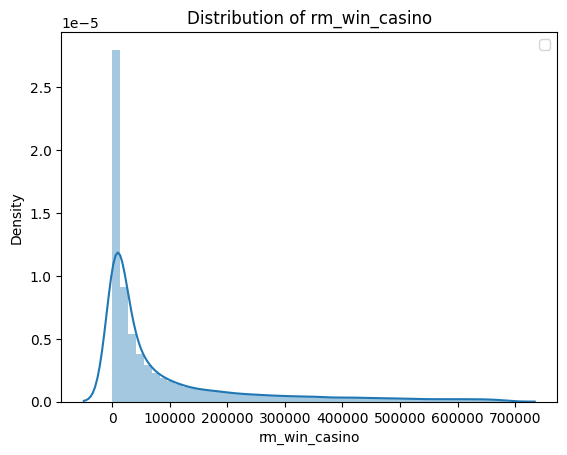

####################################################################################


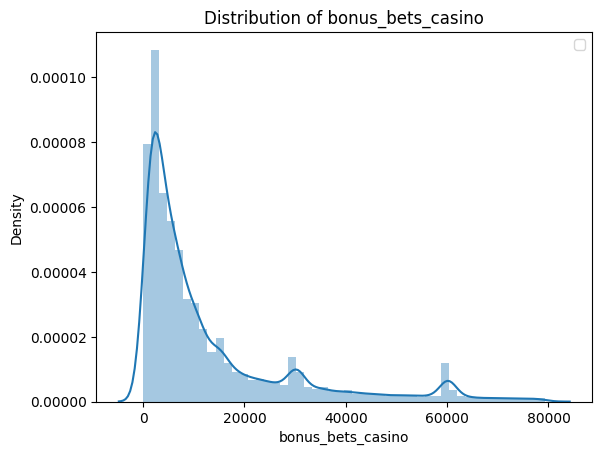

####################################################################################


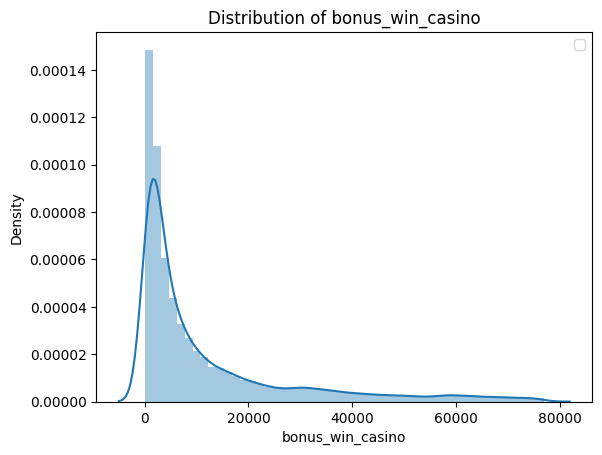

####################################################################################


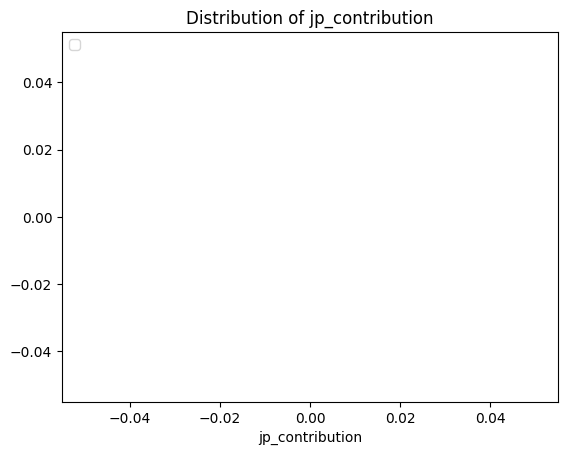

####################################################################################


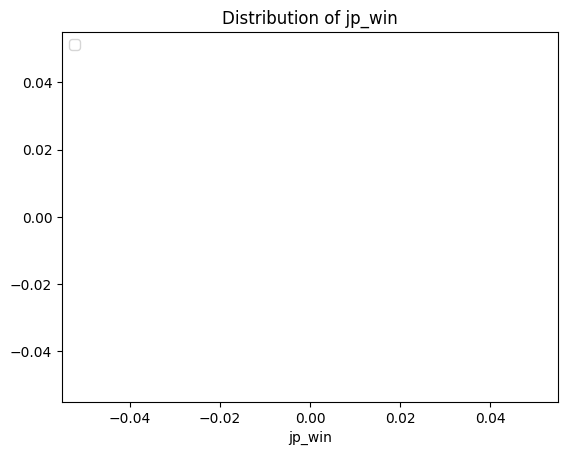

####################################################################################


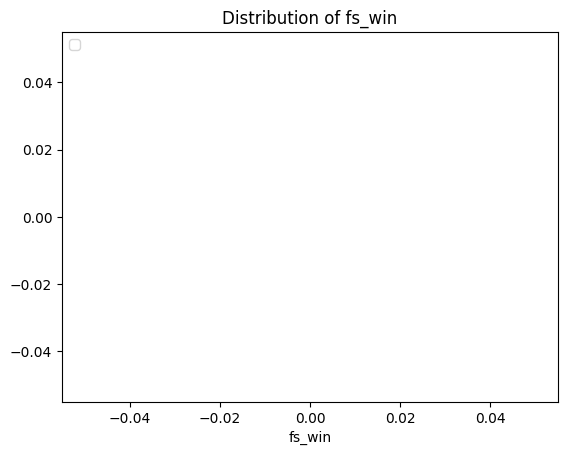

####################################################################################


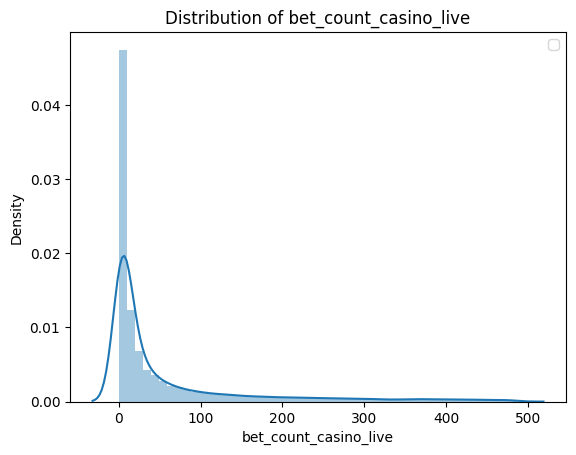

####################################################################################


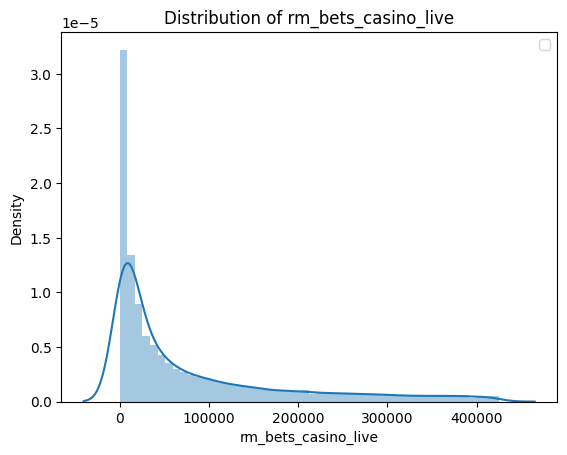

####################################################################################


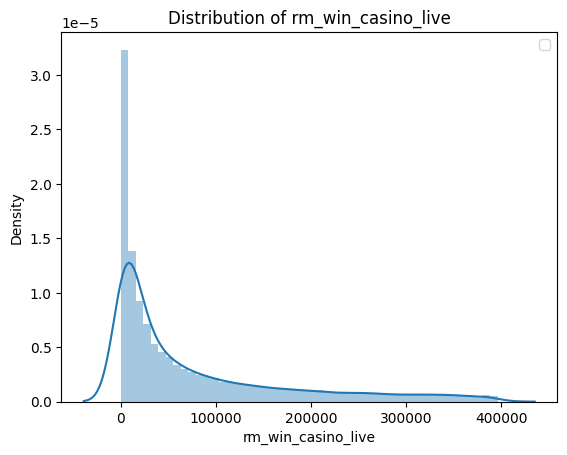

####################################################################################


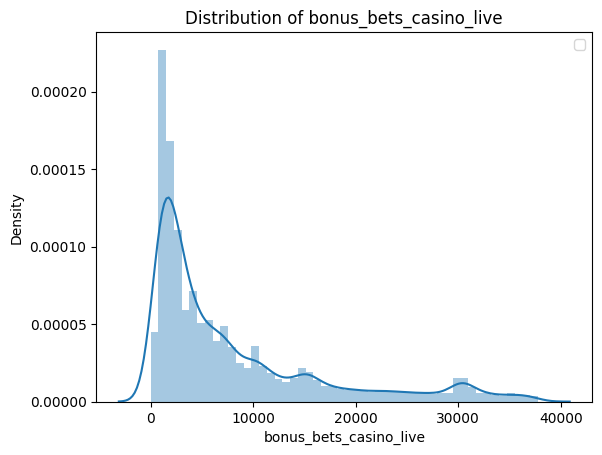

####################################################################################


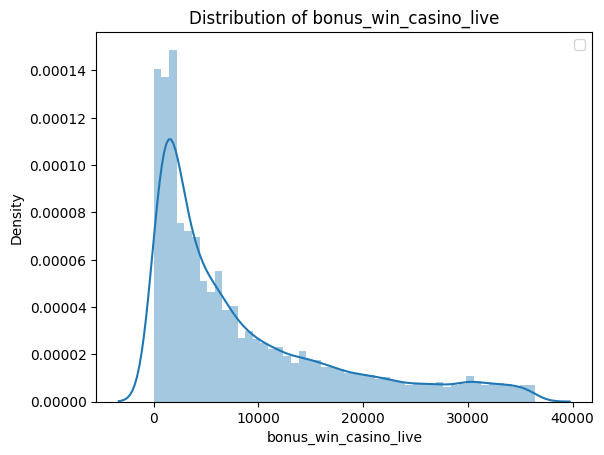

####################################################################################


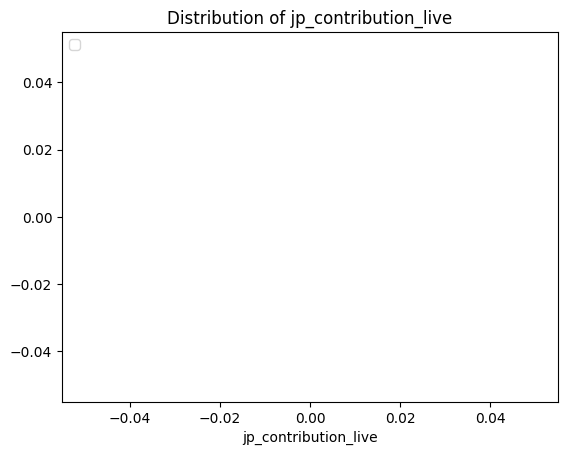

####################################################################################


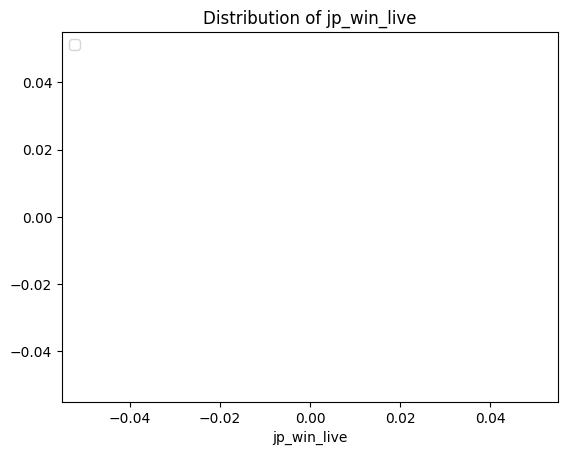

####################################################################################


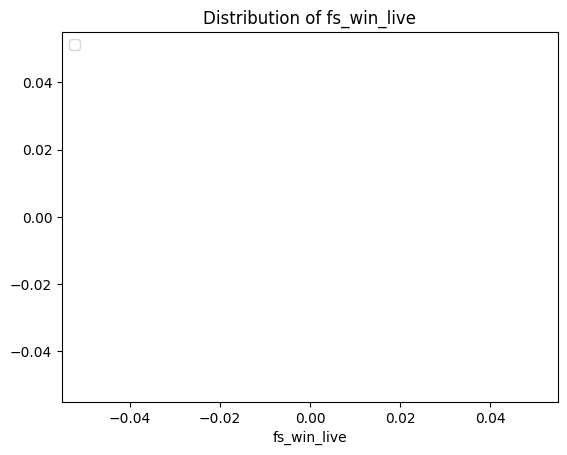

####################################################################################


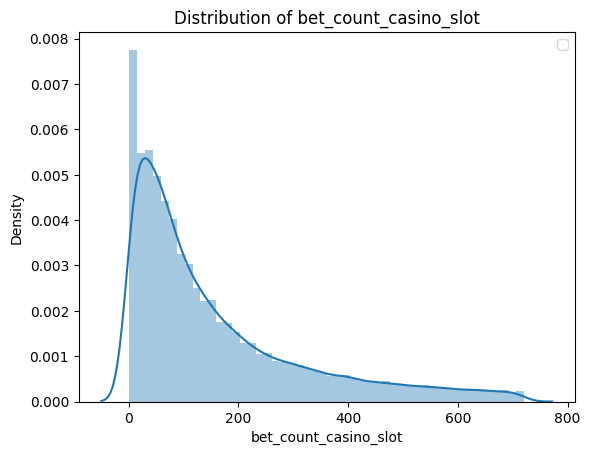

####################################################################################


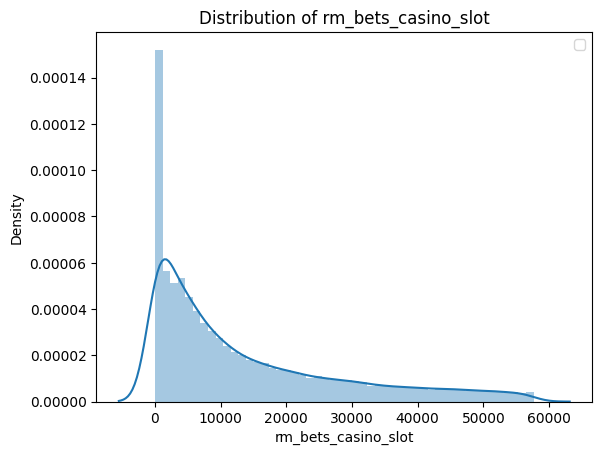

####################################################################################


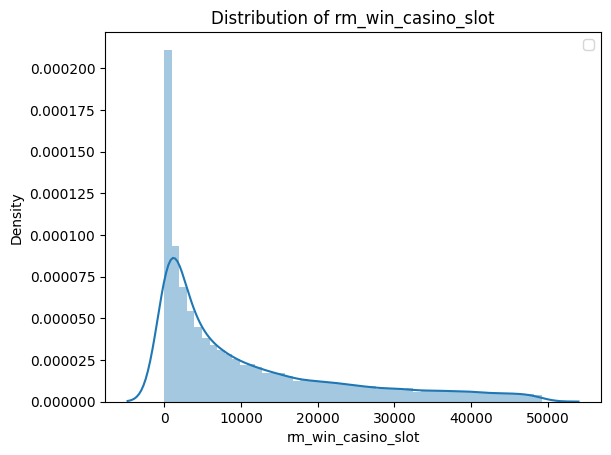

####################################################################################


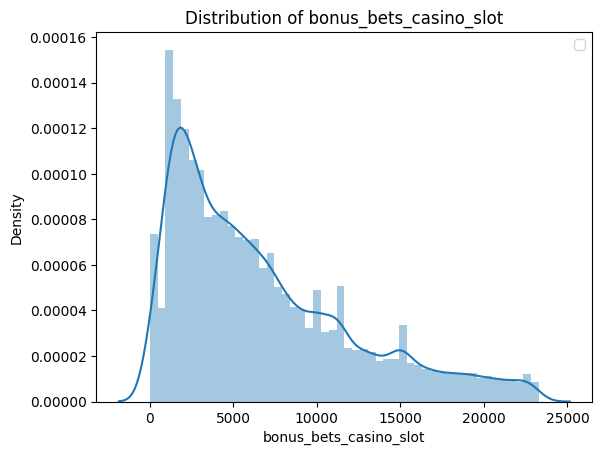

####################################################################################


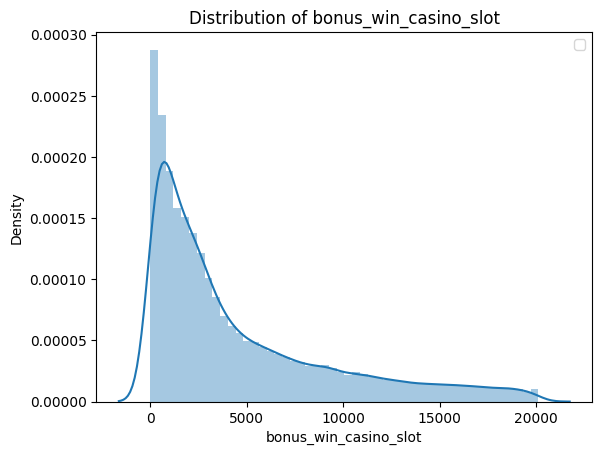

####################################################################################


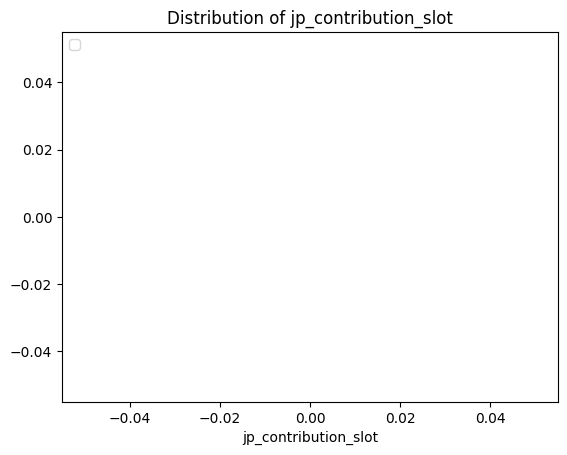

####################################################################################


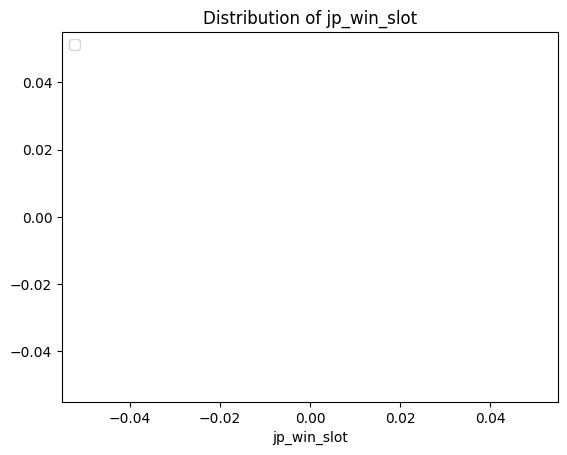

####################################################################################


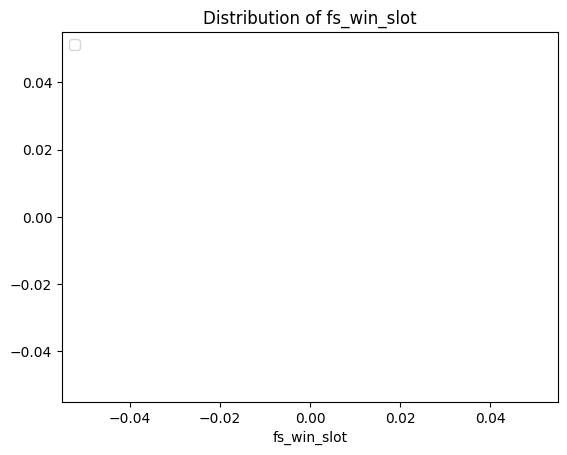

####################################################################################


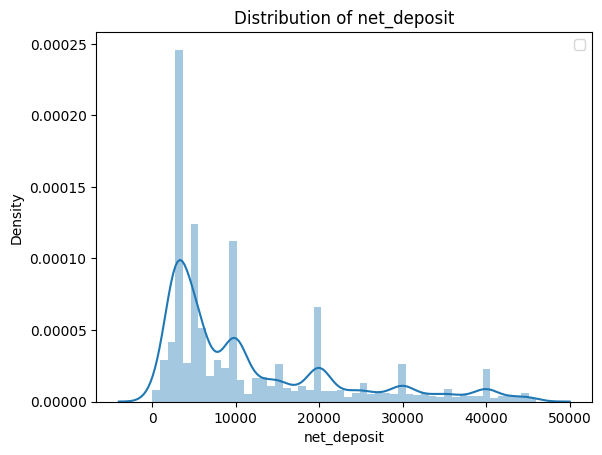

####################################################################################


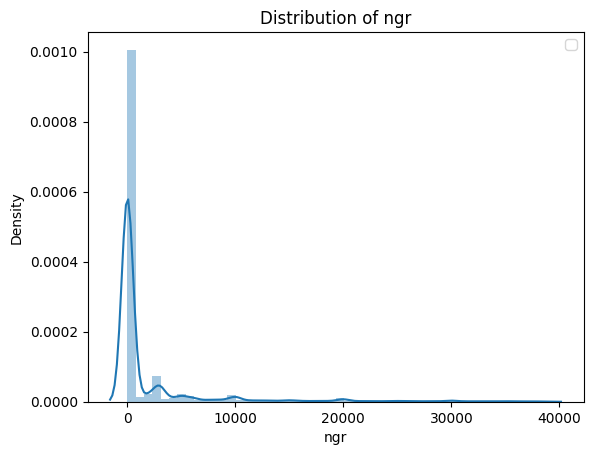

####################################################################################


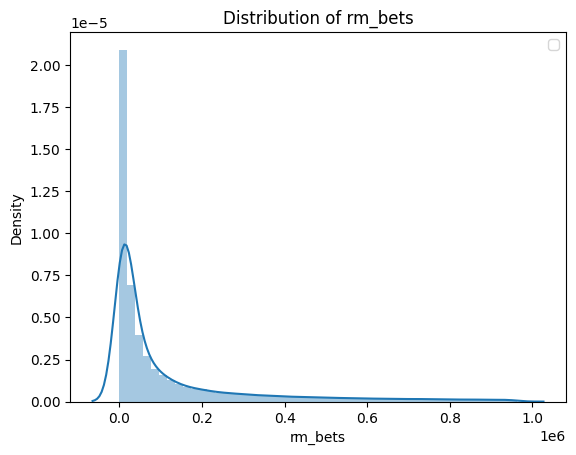

####################################################################################


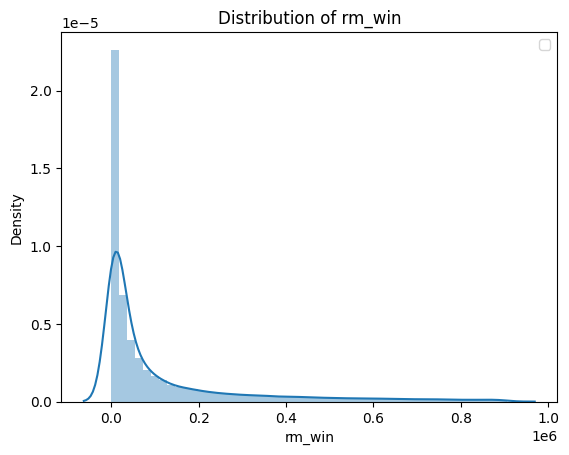

####################################################################################


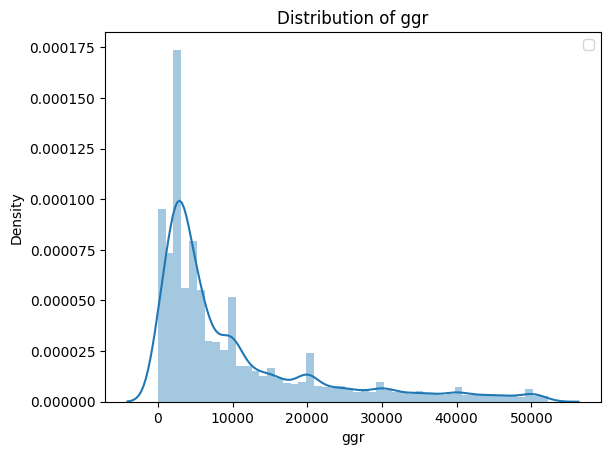

####################################################################################


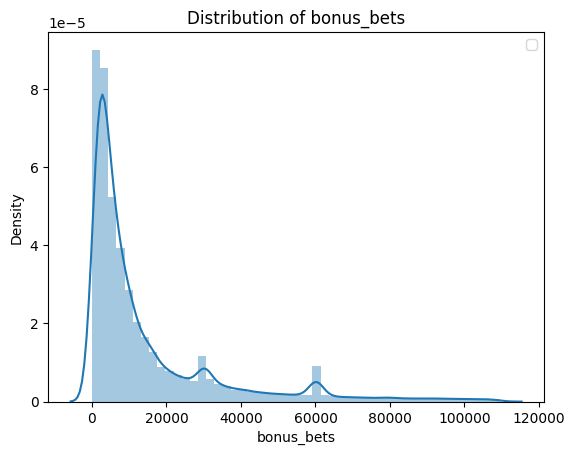

####################################################################################


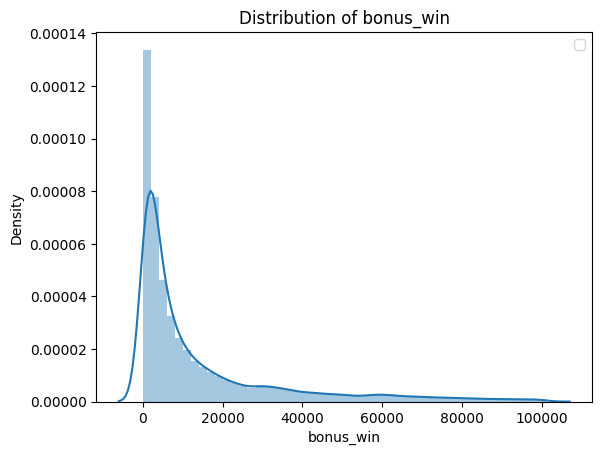

####################################################################################


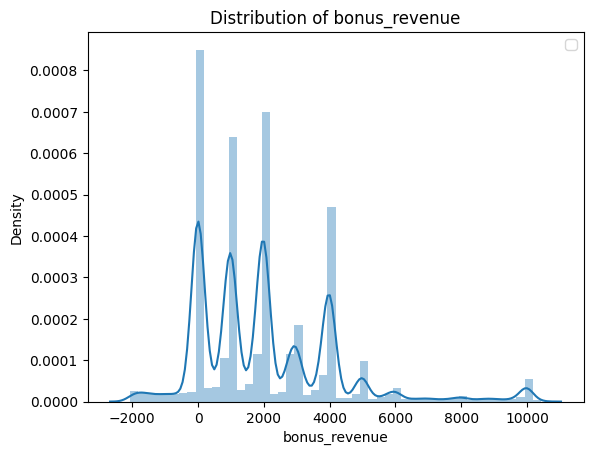

####################################################################################


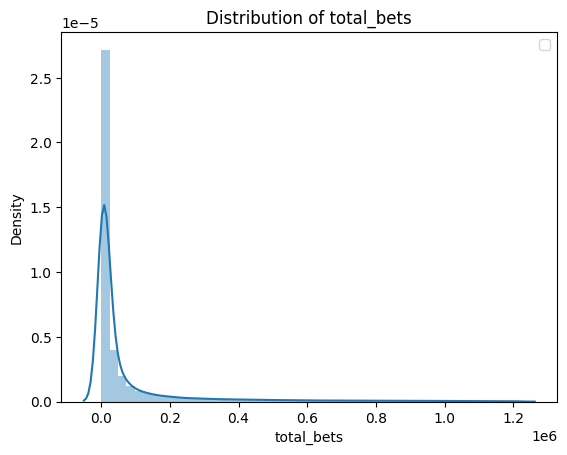

####################################################################################


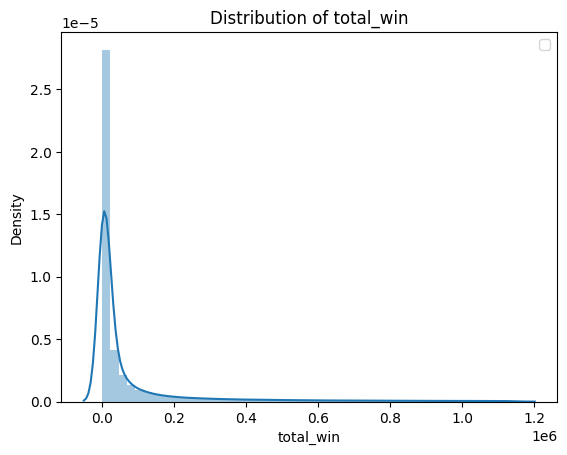

####################################################################################


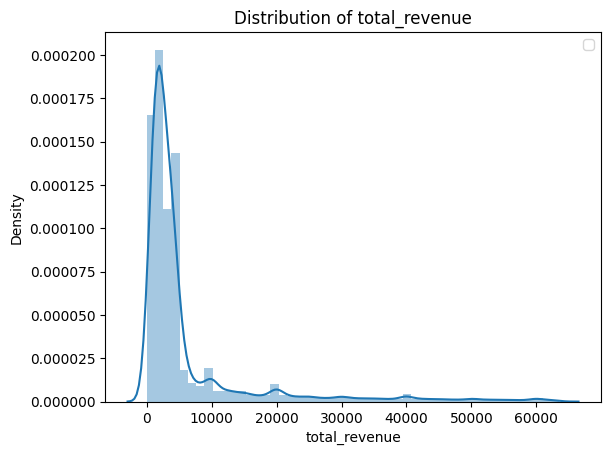

####################################################################################


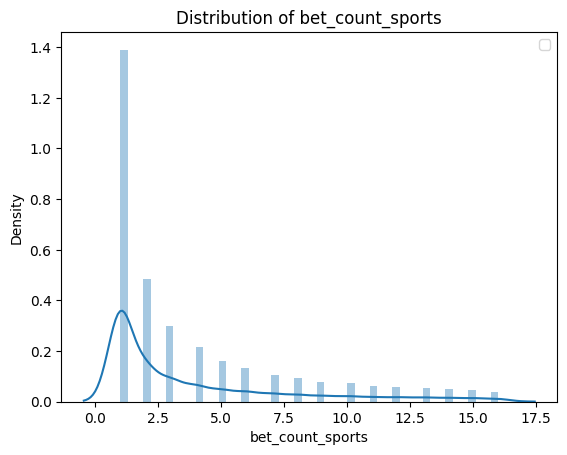

####################################################################################


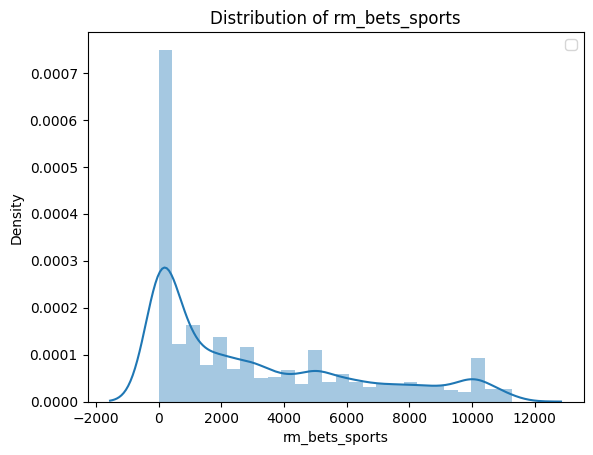

####################################################################################


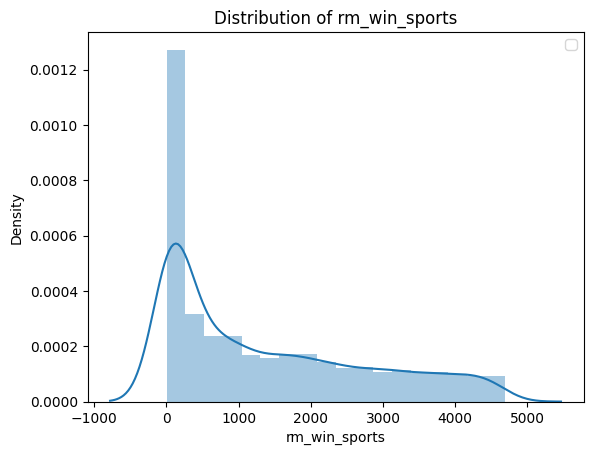

####################################################################################


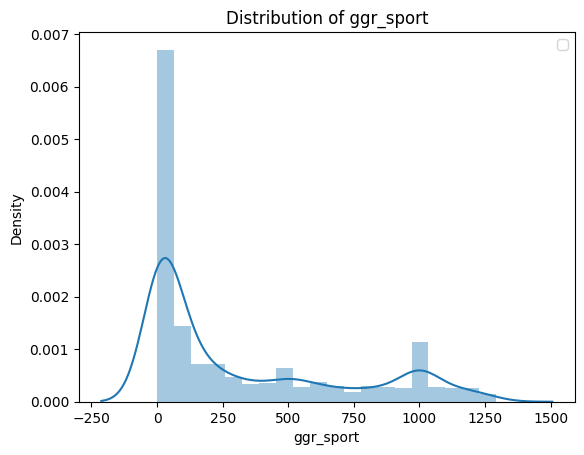

####################################################################################


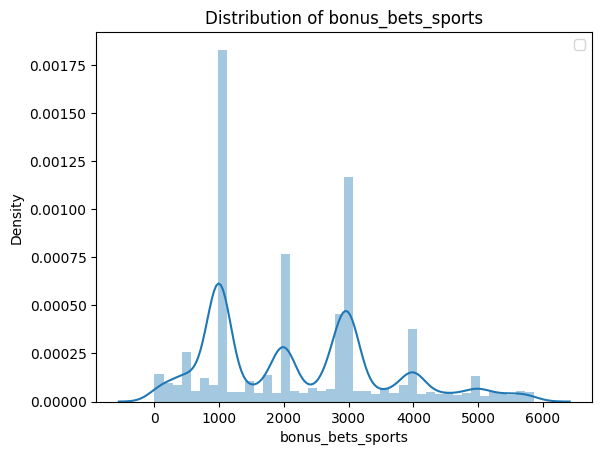

####################################################################################


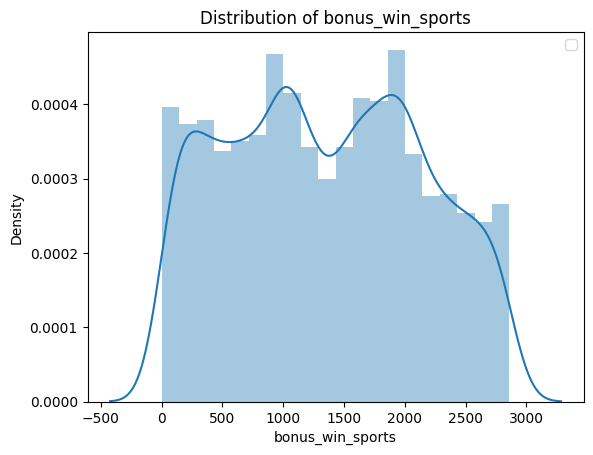

####################################################################################


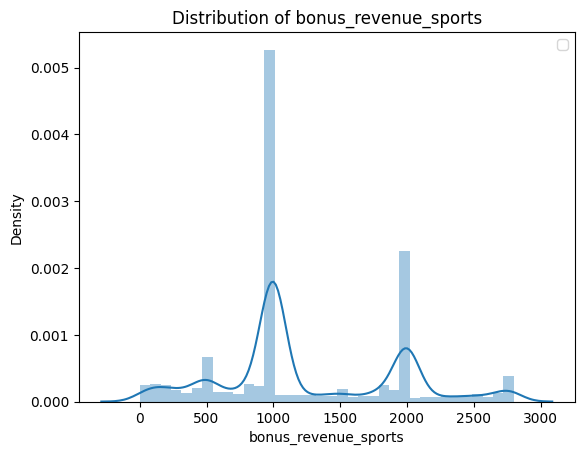

####################################################################################


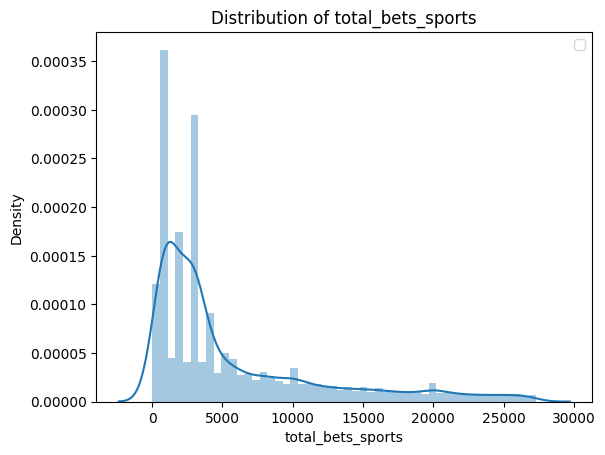

####################################################################################


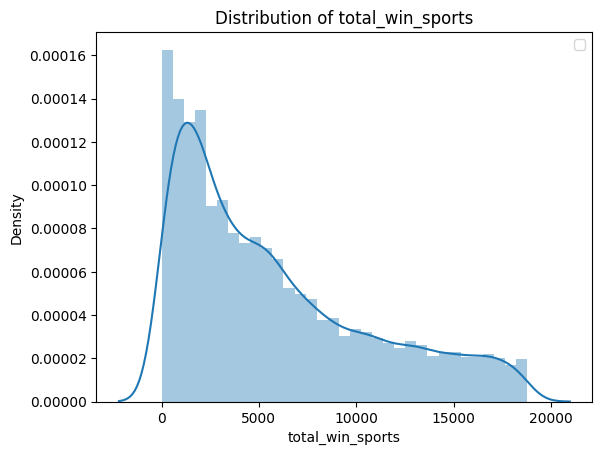

####################################################################################


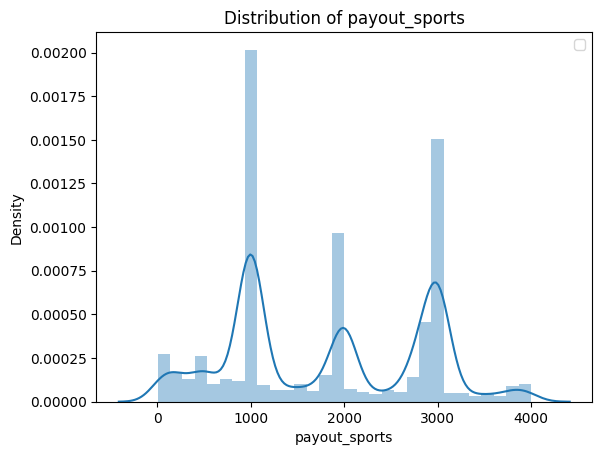

####################################################################################


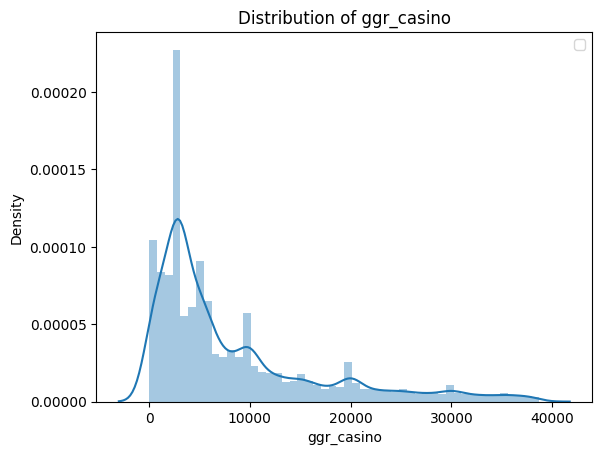

####################################################################################


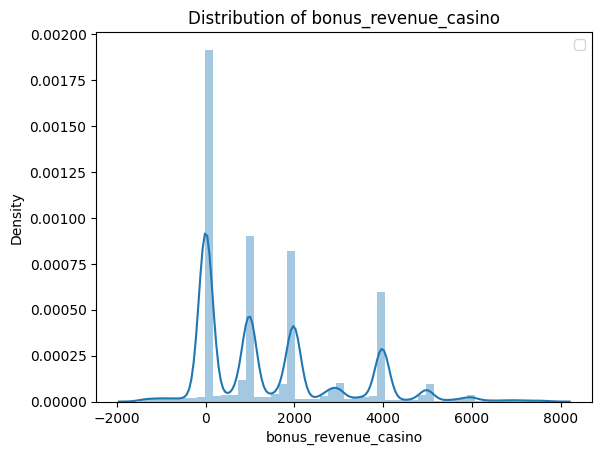

####################################################################################


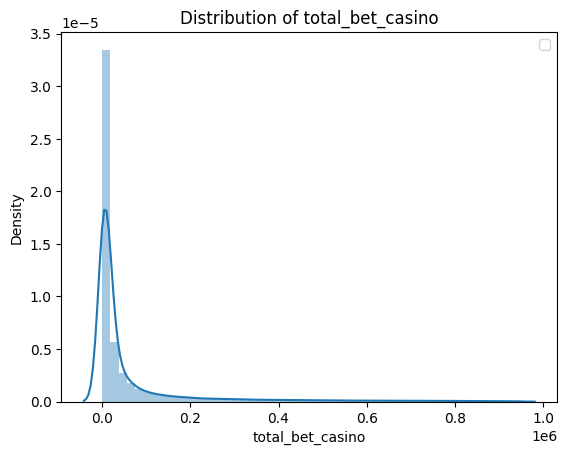

####################################################################################


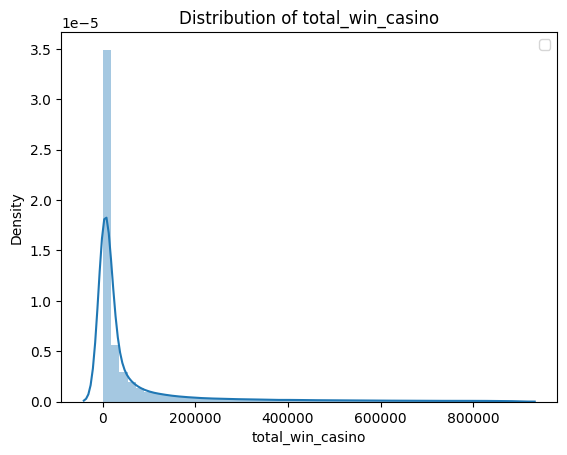

####################################################################################


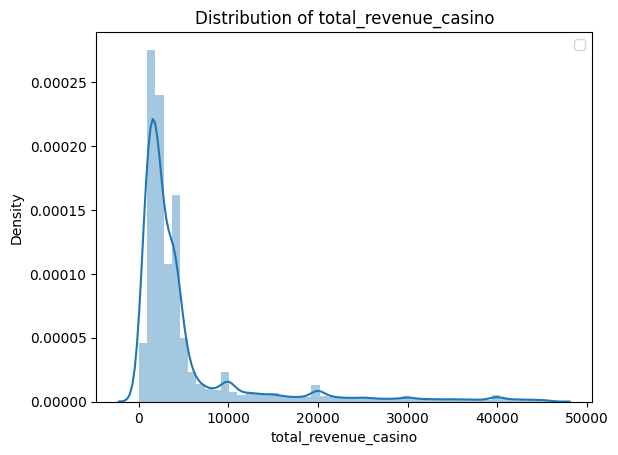

####################################################################################


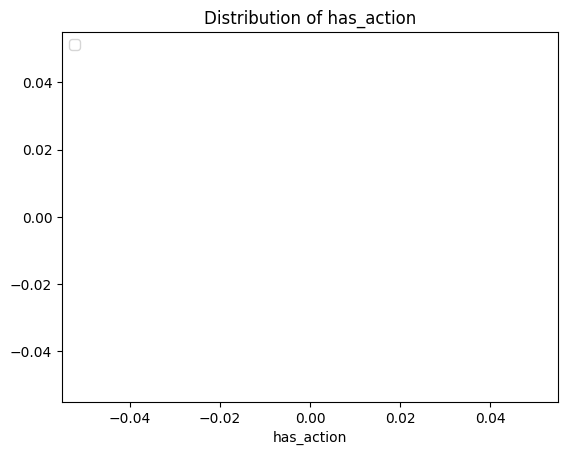

####################################################################################


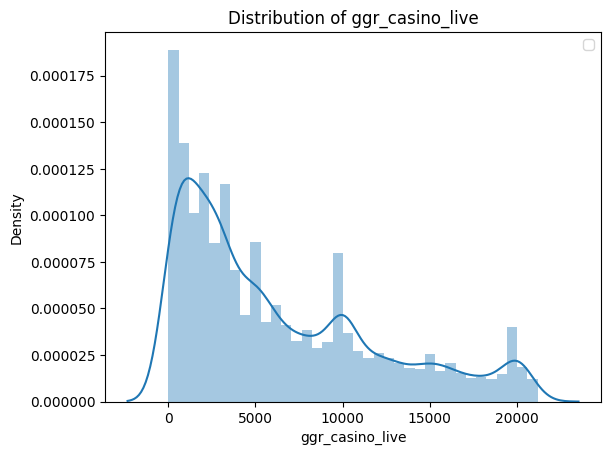

####################################################################################


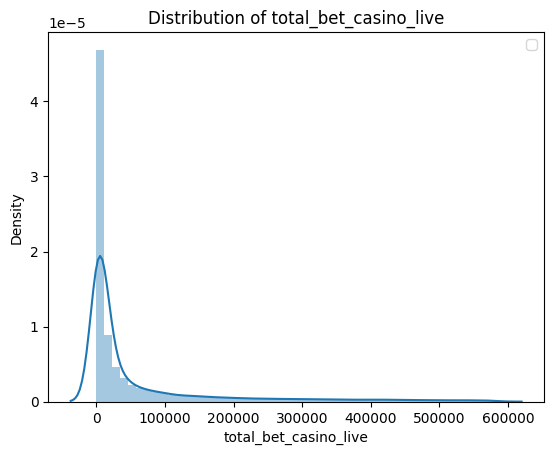

####################################################################################


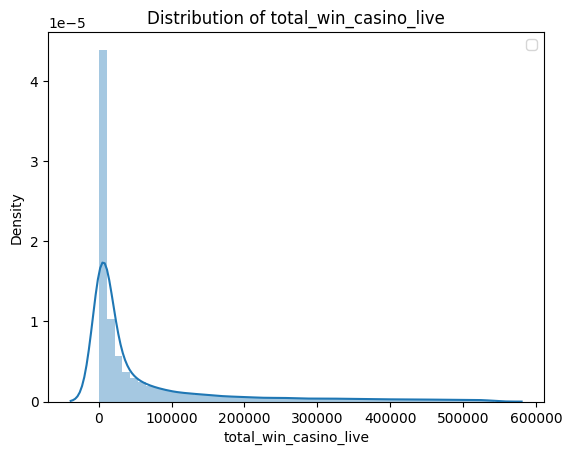

####################################################################################


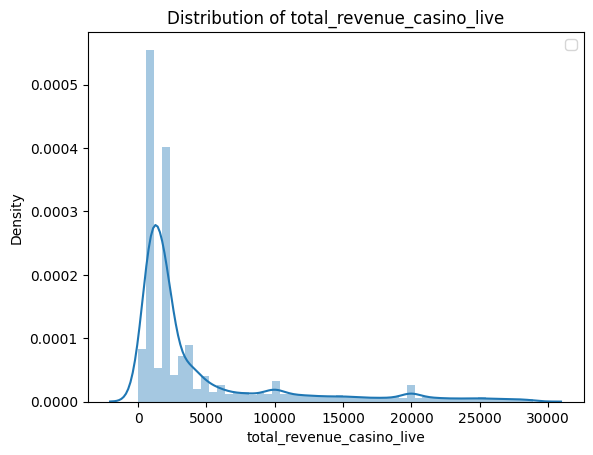

####################################################################################


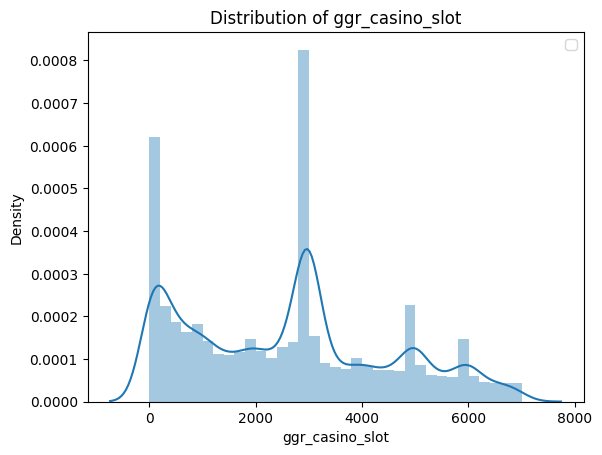

####################################################################################


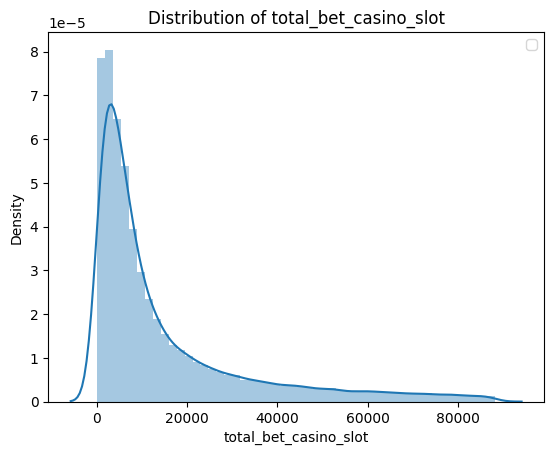

####################################################################################


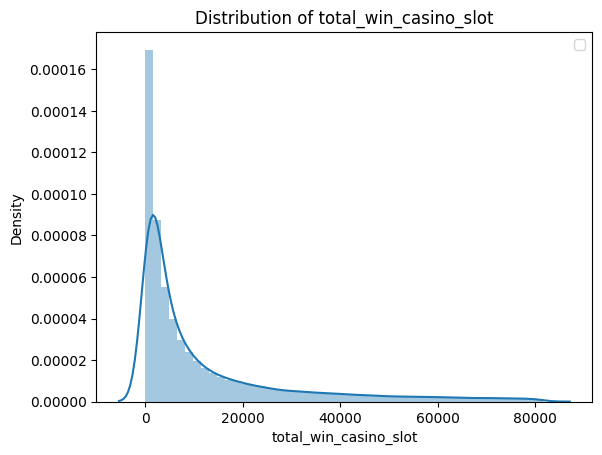

####################################################################################


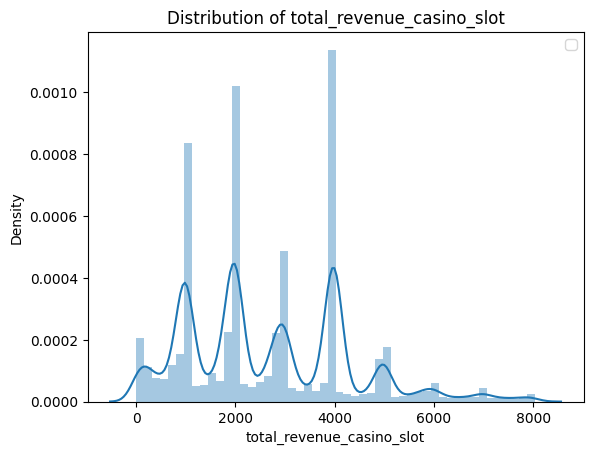

####################################################################################


In [46]:
for col in X.columns:
    sns.distplot(data[(data[col] < data[col].quantile(0.90)) & (data[col] > data[col].quantile(0.1))][col])
    plt.title("Distribution of {}".format(col))
    plt.legend()
    plt.show()
    print("####################################################################################")

## K-Means: SOTA

In [15]:
"""
State-of-the-art KMeans clustering implementation (Python, NumPy, Pandas)

Features:
- k-means++ initialization (fast, vectorized)
- optional PCA-based initialization
- minibatch KMeans option
- multiple restarts (n_init) and best inertia selection
- support for Euclidean and Cosine distance
- partial_fit for online updates
- efficient vectorized distance computations
- deterministic randomness via random_state

This file is self-contained and depends only on NumPy, Pandas (and optionally sklearn for additional metrics).

Usage example at the bottom shows how to use the class with a pandas DataFrame.

Author: The Number 5 (GPT)
"""

from __future__ import annotations

import numpy as np
import pandas as pd
from typing import Optional, Tuple


def _row_norms(X: np.ndarray) -> np.ndarray:
    return np.einsum('ij,ij->i', X, X)


def _euclidean_sq_distances(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    X_norms = _row_norms(X)[:, None]
    Y_norms = _row_norms(Y)[None, :]
    cross = X @ Y.T
    d2 = X_norms + Y_norms - 2.0 * cross
    d2 = np.maximum(d2, 0.0)
    return d2


def _cosine_distances(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    Xn = X / np.linalg.norm(X, axis=1, keepdims=True)
    Yn = Y / np.linalg.norm(Y, axis=1, keepdims=True)
    sim = Xn @ Yn.T
    return 1.0 - sim


def _kmeans_plusplus_init(X: np.ndarray, n_clusters: int, random_state: np.random.RandomState) -> np.ndarray:
    n_samples, _ = X.shape
    centers = np.empty((n_clusters, X.shape[1]), dtype=X.dtype)
    idx = random_state.randint(0, n_samples)
    centers[0] = X[idx]
    closest_dist_sq = _euclidean_sq_distances(X, centers[0:1]).ravel()
    for c in range(1, n_clusters):
        probs = closest_dist_sq / closest_dist_sq.sum()
        r = random_state.random_sample()
        cumulative = np.cumsum(probs)
        next_idx = np.searchsorted(cumulative, r)
        centers[c] = X[next_idx]
        new_dist_sq = _euclidean_sq_distances(X, centers[c:c+1]).ravel()
        closest_dist_sq = np.minimum(closest_dist_sq, new_dist_sq)
    return centers


class KMeans:
    def __init__(
        self,
        n_clusters: int = 8,
        init: str = 'k-means++',
        n_init: int = 10,
        max_iter: int = 300,
        tol: float = 1e-4,
        algorithm: str = 'full',
        batch_size: int = 256,
        distance: str = 'euclidean',
        random_state: Optional[int] = None,
        verbose: bool = False,
    ) -> None:
        self.n_clusters = int(n_clusters)
        self.init = init
        self.n_init = int(n_init)
        self.max_iter = int(max_iter)
        self.tol = float(tol)
        self.algorithm = algorithm
        self.batch_size = int(batch_size)
        self.distance = distance
        self.random_state = np.random.RandomState(random_state)
        self.verbose = verbose

        self.cluster_centers_: Optional[np.ndarray] = None
        self.labels_: Optional[np.ndarray] = None
        self.inertia_: Optional[float] = None
        self.n_iter_: Optional[int] = None

    def _init_centers(self, X: np.ndarray) -> np.ndarray:
        rng = self.random_state
        if self.init == 'k-means++':
            return _kmeans_plusplus_init(X, self.n_clusters, rng)
        elif self.init == 'random':
            idx = rng.choice(X.shape[0], self.n_clusters, replace=False)
            return X[idx].copy()
        elif self.init == 'pca':
            U, S, Vt = np.linalg.svd(X - X.mean(axis=0), full_matrices=False)
            comps = Vt[: self.n_clusters]
            projections = (X - X.mean(axis=0)) @ comps.T
            centers = []
            for i in range(self.n_clusters):
                idx = np.argmax(projections[:, i]) if i % 2 == 0 else np.argmin(projections[:, i])
                centers.append(X[idx])
            centers = np.vstack(centers)
            return centers
        else:
            raise ValueError(f"Unknown init method '{self.init}'")

    def _compute_distances(self, X: np.ndarray, centers: np.ndarray) -> np.ndarray:
        if self.distance == 'euclidean':
            return _euclidean_sq_distances(X, centers)
        elif self.distance == 'cosine':
            return _cosine_distances(X, centers)
        else:
            raise ValueError(f"Unknown distance '{self.distance}'")

    def _single_run(self, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray, float, int]:
        centers = self._init_centers(X)
        n_samples = X.shape[0]
        labels = np.full(n_samples, -1, dtype=int)
        prev_inertia = None
        for it in range(1, self.max_iter + 1):
            dists = self._compute_distances(X, centers)
            labels = np.argmin(dists, axis=1)
            inertia = float(dists[np.arange(n_samples), labels].sum())
            if prev_inertia is not None:
                if abs(prev_inertia - inertia) <= self.tol * max(1.0, prev_inertia):
                    if self.verbose:
                        print(f"Converged at iter {it} inertia {inertia:.6f}")
                    break
            prev_inertia = inertia
            new_centers = np.zeros_like(centers)
            counts = np.zeros(self.n_clusters, dtype=int)
            for k in range(self.n_clusters):
                members = X[labels == k]
                if members.shape[0] == 0:
                    new_centers[k] = X[self.random_state.randint(0, n_samples)]
                    counts[k] = 1
                else:
                    counts[k] = members.shape[0]
                    new_centers[k] = members.mean(axis=0)
            centers = new_centers
        return centers, labels, inertia, it

    def fit(self, data: pd.DataFrame) -> 'KMeans':
        X = data.values.astype(float)
        best_inertia = np.inf
        best_centers = None
        best_labels = None
        best_n_iter = 0
        for i in range(self.n_init):
            if self.verbose and self.n_init > 1:
                print(f"Initialization {i+1}/{self.n_init}")
            centers, labels, inertia, n_iter = self._single_run(X)
            if inertia < best_inertia:
                best_inertia = inertia
                best_centers = centers
                best_labels = labels
                best_n_iter = n_iter
        self.cluster_centers_ = best_centers
        self.labels_ = best_labels
        self.inertia_ = float(best_inertia)
        self.n_iter_ = int(best_n_iter)
        return self

    def predict(self, data: pd.DataFrame) -> np.ndarray:
        X = data.values.astype(float)
        if self.cluster_centers_ is None:
            raise ValueError("Model not fitted yet.")
        d = self._compute_distances(X, self.cluster_centers_)
        return np.argmin(d, axis=1)

    def transform(self, data: pd.DataFrame) -> np.ndarray:
        X = data.values.astype(float)
        if self.cluster_centers_ is None:
            raise ValueError("Model not fitted yet.")
        return self._compute_distances(X, self.cluster_centers_)

    def fit_predict(self, data: pd.DataFrame) -> np.ndarray:
        self.fit(data)
        return self.labels_.copy()

    def partial_fit(self, data: pd.DataFrame) -> 'KMeans':
        X = data.values.astype(float)
        if self.cluster_centers_ is None:
            self.cluster_centers_ = self._init_centers(X)
            self._counts = np.zeros(self.n_clusters, dtype=int)
        d = self._compute_distances(X, self.cluster_centers_)
        labels = np.argmin(d, axis=1)
        for k in range(self.n_clusters):
            members = X[labels == k]
            m = members.shape[0]
            if m == 0:
                continue
            if not hasattr(self, '_counts'):
                self._counts = np.zeros(self.n_clusters, dtype=int)
            prev_count = self._counts[k]
            new_count = prev_count + m
            self.cluster_centers_[k] = (self.cluster_centers_[k] * prev_count + members.sum(axis=0)) / new_count
            self._counts[k] = new_count
        return self

In [13]:
if __name__ == '__main__':
    print("Demo of the KMeans implementation with an existing pandas DataFrame 'data'")

    try:
        from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
    except Exception:
        silhouette_score = calinski_harabasz_score = davies_bouldin_score = None

    # Assume 'data' is already defined as a pandas DataFrame externally.

    model = KMeans(n_clusters=5, init='k-means++', n_init=8, max_iter=300, tol=1e-4, random_state=42, verbose=False)
    model.fit(data)
    print(f"Inertia: {model.inertia_:.4f}, iters: {model.n_iter_}")

    labels = model.labels_
    if silhouette_score is not None:
        try:
            sil = silhouette_score(data.values, labels)
            ch = calinski_harabasz_score(data.values, labels)
            db = davies_bouldin_score(data.values, labels)
            print(f"Silhouette Score: {sil:.4f}")
            print(f"Calinski-Harabasz Index: {ch:.4f}")
            print(f"Davies-Bouldin Index: {db:.4f}")
        except Exception:
            print("Could not compute clustering quality metrics.")
    else:
        print("Install scikit-learn to compute unsupervised clustering metrics.")

    # Example of minibatch usage if desired
    rng = np.random.RandomState(42)
    model_mb = KMeans(n_clusters=5, init='k-means++', n_init=1, algorithm='minibatch', batch_size=128, random_state=0)
    for _ in range(20):
        batch_idx = rng.choice(data.shape[0], model_mb.batch_size, replace=False)
        batch_df = data.iloc[batch_idx]
        model_mb.partial_fit(batch_df)
    print("Finished naive minibatch partial_fit demo.")

Demo of the KMeans implementation with an existing pandas DataFrame 'data'
Inertia: 13124296322426406436864.0000, iters: 12
Silhouette Score: 0.9968
Calinski-Harabasz Index: 117655.3601
Davies-Bouldin Index: 0.7427
Finished naive minibatch partial_fit demo.


In [14]:
model_mb

In [17]:
if __name__ == '__main__':
    print("Demo of the KMeans implementation with an existing pandas DataFrame 'data'")

    try:
        from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
    except Exception:
        silhouette_score = calinski_harabasz_score = davies_bouldin_score = None

    # Assume 'data' is already defined as a pandas DataFrame externally.

    model = KMeans(n_clusters=5, init='k-means++', n_init=8, max_iter=300, tol=1e-4, random_state=42, verbose=False)
    model.fit(data)
    print(f"Inertia: {model.inertia_:.4f}, iters: {model.n_iter_}")

    # Add cluster labels to the DataFrame
    data["cluster"] = model.labels_

    if silhouette_score is not None:
        try:
            sil = silhouette_score(data.drop(columns=["cluster"]).values, model.labels_)
            ch = calinski_harabasz_score(data.drop(columns=["cluster"]).values, model.labels_)
            db = davies_bouldin_score(data.drop(columns=["cluster"]).values, model.labels_)
            print(f"Silhouette Score: {sil:.4f}")
            print(f"Calinski-Harabasz Index: {ch:.4f}")
            print(f"Davies-Bouldin Index: {db:.4f}")
        except Exception:
            print("Could not compute clustering quality metrics.")
    else:
        print("Install scikit-learn to compute unsupervised clustering metrics.")

    # Example of minibatch usage if desired
    rng = np.random.RandomState(42)
    model_mb = KMeans(n_clusters=5, init='k-means++', n_init=1, algorithm='minibatch', batch_size=128, random_state=0)
    for _ in range(20):
        batch_idx = rng.choice(data.shape[0], model_mb.batch_size, replace=False)
        batch_df = data.iloc[batch_idx].drop(columns=["cluster"])
        model_mb.partial_fit(batch_df)
    print("Finished naive minibatch partial_fit demo.")


Demo of the KMeans implementation with an existing pandas DataFrame 'data'
Inertia: 13124296322426406436864.0000, iters: 12
Silhouette Score: 0.9968
Calinski-Harabasz Index: 117655.3601
Davies-Bouldin Index: 0.7427
Finished naive minibatch partial_fit demo.


In [19]:
data["cluster"].value_counts()

cluster
0    172773
1        59
4        48
3         7
2         3
Name: count, dtype: int64

## K-Means

In [7]:
data.sample()

,player_id,partner_id,balance,bonus_granted,bonus_costs,rebates_claimable_instant,rebates_claimable_payment,rebates_claimable_periodic,rebates_claimed_instant,rebates_claimed_payment,rebates_claimed_periodic,deposit_amount,deposit_count,withdrawal_amount,withdrawal_count,pending_bets,pending_bets_amount,liability,pending_bets_all,pending_bets_amount_all,liability_all,adjustments,bet_count_casino,rm_bets_casino,rm_win_casino,bonus_bets_casino,bonus_win_casino,jp_contribution,jp_win,fs_win,bet_count_casino_live,rm_bets_casino_live,rm_win_casino_live,bonus_bets_casino_live,bonus_win_casino_live,jp_contribution_live,jp_win_live,fs_win_live,bet_count_casino_slot,rm_bets_casino_slot,rm_win_casino_slot,bonus_bets_casino_slot,bonus_win_casino_slot,jp_contribution_slot,jp_win_slot,fs_win_slot,net_deposit,ngr,rm_bets,rm_win,ggr,bonus_bets,bonus_win,bonus_revenue,total_bets,total_win,total_revenue,bet_count_sports,rm_bets_sports,rm_win_sports,ggr_sport,bonus_bets_sports,bonus_win_sports,bonus_revenue_sports,total_bets_sports,total_win_sports,payout_sports,ggr_casino,bonus_revenue_casino,total_bet_casino,total_win_casino,total_revenue_casino,has_action,ggr_casino_live,total_bet_casino_live,total_win_casino_live,total_revenue_casino_live,ggr_casino_slot,total_bet_casino_slot,total_win_casino_slot,total_revenue_casino_slot
169475,612170,2,0,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,215,0,0,8600,6624,0,0,0,0,0,0,0,0,0,0,0,215,0,0,8600,6624,0,0,0,0,0,0,0,0,8600,6624,1976,8600,6624,1976,0,0,0,0,0,0,0,0,0,0,0,1976,8600,6624,1976,1,0,0,0,0,0,8600,6624,1976


Original dimensions: 80
Reduced dimensions (80% variance): 18


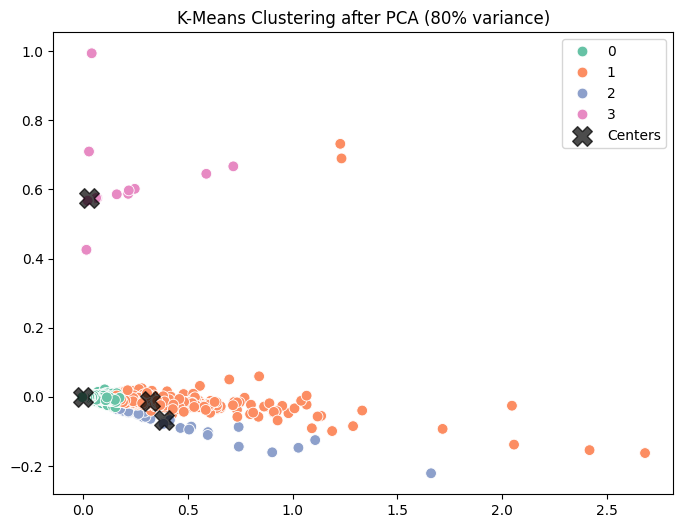

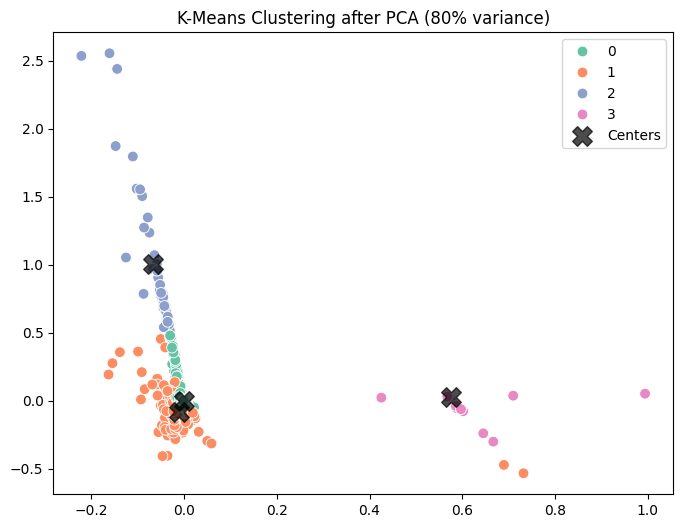

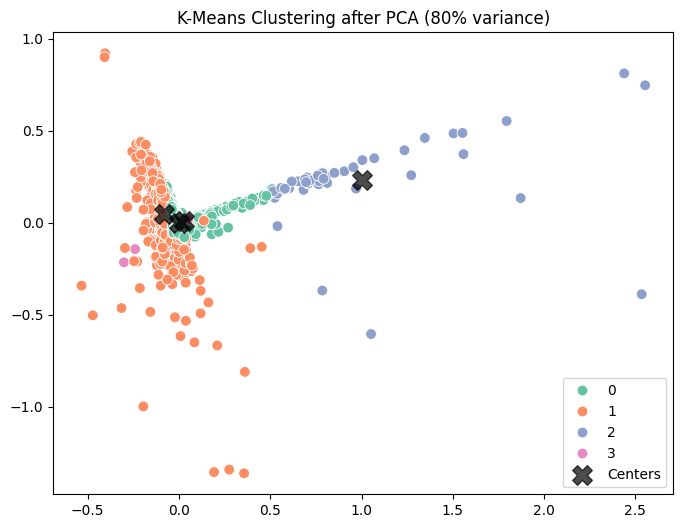

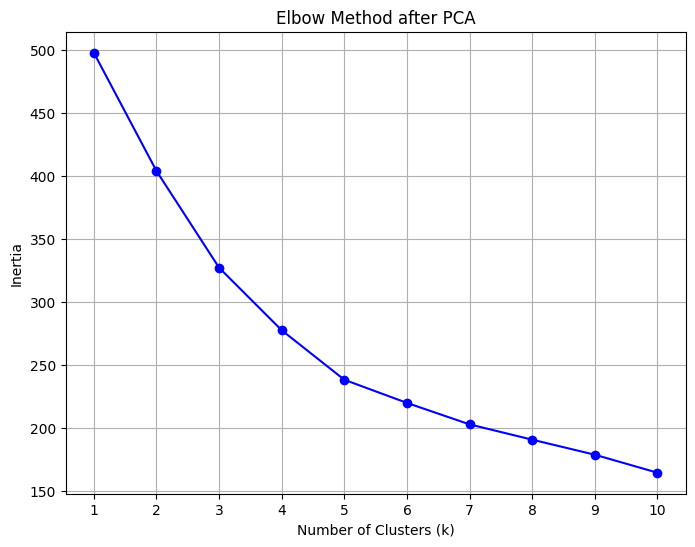

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop(columns= "player_id")

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Original dimensions: {X_scaled.shape[1]}")
print(f"Reduced dimensions (80% variance): {X_pca.shape[1]}")

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_pca)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set2", s=60)
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, alpha=0.7, marker="X", label="Centers")
plt.legend()
plt.title("K-Means Clustering after PCA (80% variance)")
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,1], y=X_pca[:,2], hue=labels, palette="Set2", s=60)
plt.scatter(centers[:,1], centers[:,2], c="black", s=200, alpha=0.7, marker="X", label="Centers")
plt.legend()
plt.title("K-Means Clustering after PCA (80% variance)")
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,2], y=X_pca[:,3], hue=labels, palette="Set2", s=60)
plt.scatter(centers[:,2], centers[:,3], c="black", s=200, alpha=0.7, marker="X", label="Centers")
plt.legend()
plt.title("K-Means Clustering after PCA (80% variance)")
plt.show()


inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method after PCA")
plt.xticks(K)
plt.grid(True)
plt.show()
